In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
scipy.__version__


df = pd.read_csv('Data/tmdb_results_combined.csv.gz', low_memory=False)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.300,1137.0,PG-13
1,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,117.0,PG-13
2,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.694,2360.0,R
3,tt0120737,0.0,/tqj7NKj11keFuLzPsBDMUq2dOUO.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.385,21402.0,PG-13
4,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.348,302.0,R


In [3]:
df.dropna(subset=['certification'], inplace=True)
df.isna().sum()

imdb_id                    0
adult                      0
backdrop_path              7
belongs_to_collection    235
budget                     0
genres                     0
homepage                 255
id                         0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                   21
title                      0
video                      0
vote_average               0
vote_count                 0
certification              0
dtype: int64

In [4]:
df['certification'].value_counts()

R        142
PG-13    117
PG        29
G         13
NR         6
Name: certification, dtype: int64

In [5]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts()

R        142
PG-13    117
PG        29
G         13
NR         6
Name: certification, dtype: int64

In [6]:
r_df = df.loc[(df['certification'] == 'R')]
r_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.694,2360.0,R
4,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.348,302.0,R
9,tt0139654,0.0,/8kxhwABuQhoybGr6TPdrV8w5FLm.jpg,"{'id': 945477, 'name': 'Training Day Collectio...",45000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,2034.0,en,Training Day,...,104876233.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The only thing more dangerous than the line be...,Training Day,0.0,7.463,4826.0,R
10,tt0141907,0.0,/l1VJVGohlSDSQr85hZNlZjMlb6L.jpg,NaN,90000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,24113.0,en,Town & Country,...,10372291.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's no such thing as a small affair.,Town & Country,0.0,4.700,51.0,R
13,tt0160399,0.0,/5HbPMhiLMP11NbLX66pVXnOZNmE.jpg,NaN,40000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",NaN,4965.0,en,Impostor,...,8694320.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In the Future, not everyone is who they seem t...",Impostor,0.0,6.131,333.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,tt0229260,0.0,/unVjWj6KsRXk67pEkBfxflpbyRV.jpg,"{'id': 64750, 'name': 'Blair Witch Collection'...",15000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",NaN,11531.0,en,Book of Shadows: Blair Witch 2,...,47737094.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Doesn't Die.,Book of Shadows: Blair Witch 2,0.0,4.215,644.0,R
337,tt0229340,0.0,/lcTKB7rQEqVhZPY8Y0PF6yTdzkb.jpg,NaN,2000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,22617.0,en,Dinner Rush,...,1075504.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Dinner Rush,0.0,7.344,48.0,R
349,tt0245712,0.0,/3YzVtvNERQOIJXnrcWv3xhj5EMT.jpg,NaN,2000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,55.0,es,Amores perros,...,20908467.0,154.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Love. Betrayal. Death.,Amores Perros,0.0,7.616,2078.0,R
350,tt0247586,0.0,/cFw9RiGHaZhGYOPr6pmTQ54UOjM.jpg,NaN,1300000.0,"[{'id': 80, 'name': 'Crime'}]",NaN,18079.0,es,Nueve reinas,...,12413888.0,114.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Sticky & Square,Nine Queens,0.0,7.763,539.0,R


In [7]:
g_df = df.loc[(df['certification'] == 'G')]
g_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
33,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...",115000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.",...,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,7.822,15862.0,G
108,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...",37000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,...,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,6.930,4238.0,G
146,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...",10000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,...,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,6.491,274.0,G
155,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,25000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,...,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,5.910,732.0,G
165,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,25000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,...,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,5.706,126.0,G
195,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4106.0,G
200,tt0120917,0.0,/neH7GNmzMs1BDLqHXOnTuB04dNh.jpg,"{'id': 178117, 'name': ""The Emperor's New Groo...",100000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,11688.0,en,The Emperor's New Groove,...,169327687.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It's all about... ME!,The Emperor's New Groove,0.0,7.547,5596.0,G
278,tt0192255,0.0,/xiVZGT0kKT5wCy7VaYuf5rr6Fnu.jpg,NaN,35000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",NaN,24100.0,en,The Little Vampire,...,27965865.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"They're not just best friends, they're blood b...",The Little Vampire,0.0,6.801,341.0,G
303,tt0205461,0.0,/c4uxjS8iAiNwKzFG2SGBmS0EDlp.jpg,NaN,19000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,16110.0,en,Thomas and the Magic Railroad,...,19748009.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Little Engines CAN Do Big Things...,Thomas and the Magic Railroad,0.0,5.464,55.0,G
317,tt0211181,0.0,/eqZ5t82asfprFcNS56eVruNT5G5.jpg,"{'id': 124916, 'name': '101 Dalmatians (Live-A...",85000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",NaN,10481.0,en,102 Dalmatians,...,183611771.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Meet Two Unlikely Heroes With A Bone To Pick.,102 Dalmatians,0.0,5.500,1151.0,G


In [8]:
pg_df = df.loc[(df['certification'] == 'PG')]
pg_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
6,tt0126029,0.0,/sRvXNDItGlWCqtO3j6wks52FmbD.jpg,"{'id': 2150, 'name': 'Shrek Collection', 'post...",60000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.dreamworksanimation.com/shrek/,808.0,en,Shrek,...,487853320.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The greatest fairy tale never told.,Shrek,0.0,7.700,14237.0,PG
21,tt0169102,0.0,/u4YATs3X5PLcwCb4j4M6xJcgbty.jpg,NaN,5200000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10749...",http://www.lagaan.com,19666.0,hi,लगान,...,8100000.0,224.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Lagaan: Once Upon a Time in India,0.0,7.300,437.0,PG
25,tt0181739,0.0,/arL80y4NYzjq4ExkqKiXFVBEuV5.jpg,NaN,75000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.osmosisjones.com/,12610.0,en,Osmosis Jones,...,13596911.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every BODY needs a hero,Osmosis Jones,0.0,6.503,867.0,PG
29,tt0189192,0.0,/4dlEX4GYbU1yskshllPE67pHlG0.jpg,NaN,35000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,56715.0,en,Just Visiting,...,16176732.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"They're not just from another time, they're fr...",Just Visiting,0.0,4.625,552.0,PG
61,tt0227538,0.0,/eR0VaffxtxpUpzEsbww5nbAbQry.jpg,"{'id': 86486, 'name': 'Spy Kids Collection', '...",35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,10054.0,en,Spy Kids,...,147934180.0,88.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Real spies...only smaller,Spy Kids,0.0,5.761,2898.0,PG
64,tt0230011,0.0,/fYr0fqT9NImOuaN1QgnDHgGh4Ci.jpg,"{'id': 100965, 'name': 'Atlantis Collection', ...",120000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.disney.com/atlantis,10865.0,en,Atlantis: The Lost Empire,...,186053725.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Atlantis is waiting...,Atlantis: The Lost Empire,0.0,6.950,3988.0,PG
67,tt0231402,0.0,/rz39qQDglxfpadDNVc30zL6EDuz.jpg,"{'id': 9332, 'name': 'Crocodile Dundee Collect...",21150000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,9290.0,en,Crocodile Dundee in Los Angeles,...,39438674.0,95.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,He heard there was wildlife in L.A. He didn't ...,Crocodile Dundee in Los Angeles,0.0,5.243,504.0,PG
79,tt0239395,0.0,/kILQ61VAEl4UlTsFGajKmrVQT75.jpg,"{'id': 87014, 'name': 'Cats & Dogs Collection'...",60000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",http://catsanddogsmovie.warnerbros.com/cmp/mai...,10992.0,en,Cats & Dogs,...,93375151.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Things Are Gonna Get Hairy!,Cats & Dogs,0.0,5.368,1364.0,PG
83,tt0240462,0.0,/VtFa6Ph0xCO6QJ86ihCrpsDBIO.jpg,"{'id': 3169, 'name': 'Dr. Dolittle Collection'...",70000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,10808.0,en,Dr. Dolittle 2,...,176104344.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The doctor is in again.,Dr. Dolittle 2,0.0,5.300,1426.0,PG
87,tt0241527,0.0,/t3LicFpYHeYpwqm7L5wDpd22hL5.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,671.0,en,Harry Potter and the Philosopher's Stone,...,976475550.0,152.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the magic begin.,Harry Potter and the Philosopher's Stone,0.0,7.917,23141.0,PG


In [9]:
pg_13_df = df.loc[(df['certification'] == 'PG-13')]
pg_13_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.300,1137.0,PG-13
1,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.600,117.0,PG-13
3,tt0120737,0.0,/tqj7NKj11keFuLzPsBDMUq2dOUO.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.385,21402.0,PG-13
5,tt0125022,0.0,/yYiMzRG3ADDTrPV7PFQkO0H4bY5.jpg,NaN,35000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,10833.0,en,Heartbreakers,...,57756408.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Caution: Dangerous Curves Ahead,Heartbreakers,0.0,6.032,744.0,PG-13
7,tt0132245,0.0,/w4Jvkb6BQGvQ3K3aECMsy6bZln3.jpg,NaN,94000000.0,"[{'id': 28, 'name': 'Action'}]",NaN,10477.0,en,Driven,...,54744738.0,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Get ready for the race of your life.,Driven,0.0,5.200,585.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,tt0230030,0.0,/1z0w9i94n3HocRSbttgHQm6QPT4.jpg,NaN,48000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",NaN,1636.0,en,Bedazzled,...,90383208.0,93.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Meet the Devil. She's giving Elliott seven wis...,Bedazzled,0.0,6.002,1496.0,PG-13
341,tt0241303,0.0,/63ItW5WInTWZkRdyTfCZIn6ZvbH.jpg,NaN,25000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,392.0,en,Chocolat,...,152500343.0,121.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,…and the world is still indulging!,Chocolat,0.0,7.000,2846.0,PG-13
343,tt0242423,0.0,/8GrQwNNX0Jns6XWrhjt6voOnkxX.jpg,NaN,13000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",NaN,8859.0,en,"Dude, Where's My Car?",...,73180723.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"After a night they can't remember, comes a day...","Dude, Where's My Car?",0.0,5.504,1511.0,PG-13
345,tt0243415,0.0,NaN,NaN,600000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,26916.0,en,Mercy Streets,...,173599.0,106.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Mercy Streets,0.0,5.200,6.0,PG-13


In [10]:
df = pd.concat([g_df,pg_df,pg_13_df,r_df], ignore_index=True)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...",115000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.",...,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,7.822,15862.0,G
1,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...",37000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,...,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,6.930,4238.0,G
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...",10000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,...,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,6.491,274.0,G
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,25000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,...,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,5.910,732.0,G
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,25000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,...,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,5.706,126.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,tt0229260,0.0,/unVjWj6KsRXk67pEkBfxflpbyRV.jpg,"{'id': 64750, 'name': 'Blair Witch Collection'...",15000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",NaN,11531.0,en,Book of Shadows: Blair Witch 2,...,47737094.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Doesn't Die.,Book of Shadows: Blair Witch 2,0.0,4.215,644.0,R
297,tt0229340,0.0,/lcTKB7rQEqVhZPY8Y0PF6yTdzkb.jpg,NaN,2000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,22617.0,en,Dinner Rush,...,1075504.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Dinner Rush,0.0,7.344,48.0,R
298,tt0245712,0.0,/3YzVtvNERQOIJXnrcWv3xhj5EMT.jpg,NaN,2000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,55.0,es,Amores perros,...,20908467.0,154.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Love. Betrayal. Death.,Amores Perros,0.0,7.616,2078.0,R
299,tt0247586,0.0,/cFw9RiGHaZhGYOPr6pmTQ54UOjM.jpg,NaN,1300000.0,"[{'id': 80, 'name': 'Crime'}]",NaN,18079.0,es,Nueve reinas,...,12413888.0,114.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Sticky & Square,Nine Queens,0.0,7.763,539.0,R


In [11]:
df1 = df.copy() #a copy for question 3

Questions to Answer

The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Null Hypothesis: Different MPAA Ratings all have the same revenues.

Alternative Hypothesis: Different MPAA Ratings have different Revenues.

Using an alpha=.05

Going to perform the ANOVA test



# Testing Assumptions

Outliers

In [12]:
p = df.loc[ df['certification']=='P',"revenue"]
pg = df.loc[ df['certification']=='PG',"revenue"]
pg_13 = df.loc[ df['certification']=='PG-13',"revenue"]
r = df.loc[ df['certification']=='R',"revenue"]

In [13]:
zscores_f = stats.zscore(p)
outliers_p = abs(zscores_f)>3
np.sum(outliers_p)

0

In [14]:
zscores_f = stats.zscore(pg)
outliers_pg = abs(zscores_f)>3
np.sum(outliers_pg)

1

In [15]:
pg[~outliers_pg]

13    487853320.0
14      8100000.0
15     13596911.0
16     16176732.0
17    147934180.0
18    186053725.0
19     39438674.0
20     93375151.0
21    176104344.0
23    274925095.0
24     37317558.0
25     24516772.0
26     42776760.0
27     12854953.0
28     36754634.0
29     36609995.0
30    354248063.0
31     35134820.0
32     76432727.0
33     35547761.0
34     59468275.0
35    345141403.0
36     60874615.0
37     62464731.0
38            1.0
39    136706683.0
40    110317580.0
41     16600000.0
Name: revenue, dtype: float64

In [16]:

pg = pg[~outliers_pg]

In [17]:
zscores_f = stats.zscore(pg_13)
outliers_pg_13 = abs(zscores_f)>3
np.sum(outliers_pg_13)

2

In [18]:
pg_13[~outliers_pg_13]

42      76019048.0
43       5271666.0
45      57756408.0
46      54744738.0
47     362211740.0
          ...     
154     90383208.0
155    152500343.0
156     73180723.0
157       173599.0
158    109280263.0
Name: revenue, Length: 115, dtype: float64

In [19]:
pg_13 = pg_13[~outliers_pg_13]

In [20]:
zscores_f = stats.zscore(r)
outliers_r = abs(zscores_f)>3
np.sum(outliers_r)

5

In [21]:
r[~outliers_r]

159     74558115.0
160     24690441.0
161    104876233.0
162     10372291.0
163      8694320.0
          ...     
296     47737094.0
297      1075504.0
298     20908467.0
299     12413888.0
300       145969.0
Name: revenue, Length: 137, dtype: float64

In [22]:
r = r[~outliers_r]

# Assumption of normality

In [23]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [24]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

C:\Users\ryan\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
G,13.0,2.738366e-05,21.011128
PG,29.0,2.157381e-09,39.908742
PG-13,117.0,1.255259e-17,77.833210
R,142.0,9.928067e-22,96.723012


In [25]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,13.0,2.738366e-05,21.011128,True
PG,29.0,2.157381e-09,39.908742,True
PG-13,117.0,1.255259e-17,77.833210,True
R,142.0,9.928067e-22,96.723012,True


# The data is not normally distributed but because of our data size we can safely ignore this.

# Test Assumption of Equal Variance

In [26]:
# with the * operator 
stats.levene(*groups.values())
# not using * operator, entering each group manually
#stats.levene(groups[p],
           # groups[pg],
           # groups[pg_13]
           # groups[r])

LeveneResult(statistic=4.825593836116351, pvalue=0.0026969182653827873)

Our P value is less then our alpha of .05. I reject the null hypothesis. There is significant difference between our groups.

In [27]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=7.243131861625018, pvalue=0.00010495893624055852)

Significant result, with such a low p value we know there are differences between our groups revenue, now to find out which groups are different.

# Post-hoc multiple comparison tests

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the certification
values = df['revenue']
labels = df['certification']

In [29]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,1396946.3422,1.0,-104135910.1246,106929802.809,False
G,PG-13,-22504821.4359,0.9227,-114940746.6234,69931103.7516,False
G,R,-80424495.7698,0.1079,-172043111.1442,11194119.6047,False
PG,PG-13,-23901767.7781,0.7825,-89488836.487,41685300.9308,False
PG,R,-81821442.1119,0.0063,-146251512.7288,-17391371.4951,True
PG-13,R,-57919674.3339,0.001,-97396888.9129,-18442459.7548,True


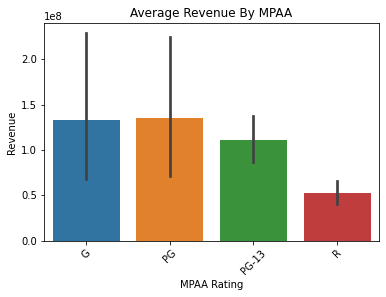

In [30]:
sns.barplot(data=df, x='certification', y= 'revenue')
plt.xticks(rotation = 45)
plt.title('Average Revenue By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Revenue');

Here we see that movies rated PG and PG-13 attain the highest amount of revenue and we have statistically backed that up with the ANOVA test.

# To answer the stackholders question we reject the null hypothesis as we see there is a significant difference in revenue based on a movies MPAA rating.

# Question 2

Does movie runtime affect revenue?

Null Hypothesis: Runtime has no effect on a movies revenue.

Alternative Hypothesis: Runtime has a significant effect on movies revenue.

Using an alpha=.05

Going to perform a t test.

In [31]:
df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/df_2002-2014_no_2007.csv.gz'

In [32]:
# remove unwanted columns
df = df.drop(columns = ['budget', 'vote_average','certification'])

# Going to split this into two groups using the median of the runtime column.
First I'm going to get all the movies that have an listed revenue.

In [33]:
rev_filter = df['revenue'] > 0

In [34]:
rev_df = df[rev_filter]
rev_df

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.","James Sullivan and Mike Wazowski are monsters,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-11-01,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,15862.0
1,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...","[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,A socially awkward but very bright 15-year-old...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-03,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,4238.0
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,It's the most exciting time of year at Third S...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-27,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,274.0
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,Jimmy Neutron is a boy genius and way ahead of...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,732.0
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,"Max Keeble, the victim of his 7th grade class,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-05,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,tt0229260,0.0,/unVjWj6KsRXk67pEkBfxflpbyRV.jpg,"{'id': 64750, 'name': 'Blair Witch Collection'...","[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",NaN,11531.0,en,Book of Shadows: Blair Witch 2,Young adults become fascinated by the events o...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-10-27,47737094.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Doesn't Die.,Book of Shadows: Blair Witch 2,0.0,644.0
297,tt0229340,0.0,/lcTKB7rQEqVhZPY8Y0PF6yTdzkb.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,22617.0,en,Dinner Rush,"One unlucky evening, Louis Cropa, a part-time ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-01,1075504.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Dinner Rush,0.0,48.0
298,tt0245712,0.0,/3YzVtvNERQOIJXnrcWv3xhj5EMT.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,55.0,es,Amores perros,A horrific car accident connects three stories...,...,"[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",2000-06-16,20908467.0,154.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Love. Betrayal. Death.,Amores Perros,0.0,2078.0
299,tt0247586,0.0,/cFw9RiGHaZhGYOPr6pmTQ54UOjM.jpg,NaN,"[{'id': 80, 'name': 'Crime'}]",NaN,18079.0,es,Nueve reinas,Two con artists try to swindle a stamp collect...,...,"[{'iso_3166_1': 'AR', 'name': 'Argentina'}]",2000-08-31,12413888.0,114.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Sticky & Square,Nine Que

In [35]:
rev_df['runtime'].median()

105.0

In [36]:
high_run_filter = rev_df['runtime'] >= 103
high_run_filter.value_counts()

True     163
False    138
Name: runtime, dtype: int64

In [37]:
high_run_df = rev_df[high_run_filter]
high_run_df

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
1,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...","[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,A socially awkward but very bright 15-year-old...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-03,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,4238.0
14,tt0169102,0.0,/u4YATs3X5PLcwCb4j4M6xJcgbty.jpg,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 10749...",http://www.lagaan.com,19666.0,hi,लगान,"In 1890s India, an arrogant British commander ...",...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2001-06-15,8100000.0,224.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Lagaan: Once Upon a Time in India,0.0,437.0
22,tt0241527,0.0,/t3LicFpYHeYpwqm7L5wDpd22hL5.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,671.0,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,976475550.0,152.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the magic begin.,Harry Potter and the Philosopher's Stone,0.0,23141.0
23,tt0245429,0.0,/Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://movies.disney.com/spirited-away,129.0,ja,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-07-20,274925095.0,125.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Spirited Away,0.0,13267.0
24,tt0268995,0.0,/1K1dvjsHOBrj03NqpfSWmrkdzIk.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,11086.0,en,The Majestic,"Set in 1951, a blacklisted Hollywood writer ge...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,37317558.0,152.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes your life comes into focus one frame...,The Majestic,0.0,593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,tt0210382,0.0,/7V4vwJrieINgLYwDAAHEZmlvCIB.jpg,NaN,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",NaN,13526.0,en,The Weight of Water,"A newspaper photographer, Jean, researches the...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-25,109130.0,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hell hath no fury...,The Weight of Water,0.0,133.0
293,tt0219699,0.0,/tUmAtUBBTUqOxn0Fggv6uxKyhs2.jpg,NaN,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,2046.0,en,The Gift,"Annie Wilson, young widow and mother of three,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-03-16,12008642.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The only witness to the crime was not even there.,The Gift,0.0,944.0
295,tt0222851,0.0,/cL1VX6WllejQQhGTUGGWHW25yor.jpg,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.office-kitano.co.jp/brother/index.html,327.0,en,Brother,A Japanese Yakuza gangster’s deadly existence ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-13,15250000.0,114.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Are You Japanese?,Brother,0.0,327.0
298,tt0245712,0.0,/3YzVtvNERQOIJXnrcWv3xhj5EMT.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,55.0,es,Amores perros,A horrific car accident connects three stories...,...,"[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",2000-06-16,20908467.0,154.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Love. Betrayal. Death.,Amores Perros,0.0,2078.

In [38]:
low_run_df = rev_df[~high_run_filter]
low_run_df

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.","James Sullivan and Mike Wazowski are monsters,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-11-01,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,15862.0
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,It's the most exciting time of year at Third S...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-27,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,274.0
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,Jimmy Neutron is a boy genius and way ahead of...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,732.0
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,"Max Keeble, the victim of his 7th grade class,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-05,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,126.0
5,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,Having been hopelessly repressed and facing ev...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,4106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,tt0219653,0.0,/aWT6cOhVOSPPHP7KMFp6Znx5S3a.jpg,"{'id': 115822, 'name': 'Dracula 2000 Collectio...","[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,10577.0,en,Dracula 2000,"Abraham Van Helsing, who has tangled with Coun...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-22,47053625.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The Most Seductive Evil of All Time Has Now Be...,Dracula 2000,0.0,526.0
294,tt0222850,0.0,/bu8Ixqtg7vx1L0UlnV5sekYXizU.jpg,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.sonypictures.com/movies/thebrokenhe...,22597.0,en,The Broken Hearts Club: A Romantic Comedy,A close-knit group of gay friends share the em...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-01,1744858.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The shortest distance between friends isn't al...,The Broken Hearts Club: A Romantic Comedy,0.0,63.0
296,tt0229260,0.0,/unVjWj6KsRXk67pEkBfxflpbyRV.jpg,"{'id': 64750, 'name': 'Blair Witch Collection'...","[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",NaN,11531.0,en,Book of Shadows: Blair Witch 2,Young adults become fascinated by the events o...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-10-27,47737094.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evil Doesn't Die.,Book of Shadows: Blair Witch 2,0.0,644.0
297,tt0229340,0.0,/lcTKB7rQEqVhZPY8Y0PF6yTdzkb.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 28,

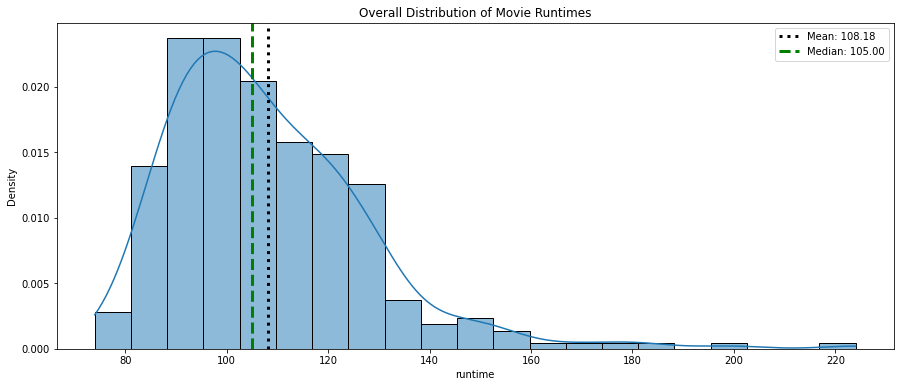

In [39]:
data = rev_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Overall Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

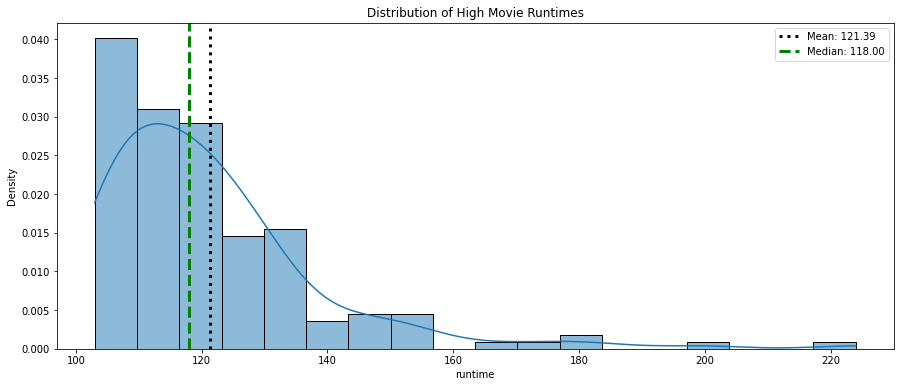

In [40]:
## Slice out data and calc stats
data = high_run_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of High Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

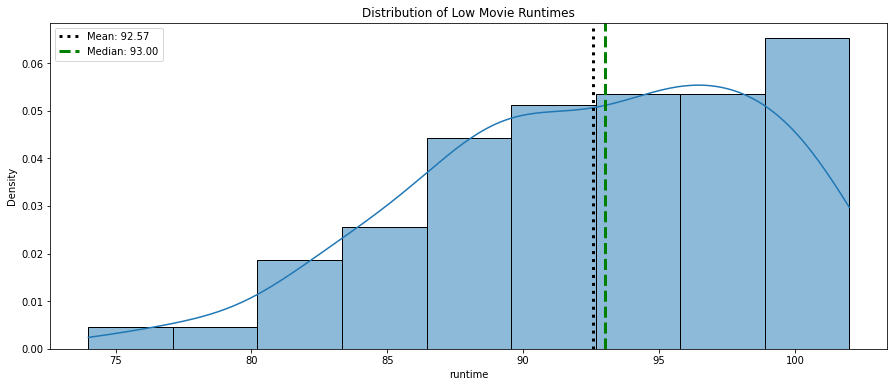

In [41]:
data = low_run_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Low Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

# Now that we visualized our overall data and the two sub sets lets begin checking assumptions.

# Testing Assumptions
Outliers

In [42]:
filter_ = rev_df['runtime'] > 103
filter_

0      False
1       True
2      False
3      False
4      False
       ...  
296    False
297    False
298     True
299     True
300    False
Name: runtime, Length: 301, dtype: bool

In [43]:
filter_.value_counts()

True     160
False    141
Name: runtime, dtype: int64

In [44]:
h_df = rev_df.loc[filter_].copy()
l_df = rev_df.loc[~filter_].copy()

In [45]:
high_run = h_df['revenue']
low_run = l_df['revenue']

In [46]:
high_run

1      165335153.0
14       8100000.0
22     976475550.0
23     274925095.0
24      37317558.0
          ...     
288       109130.0
293     12008642.0
295     15250000.0
298     20908467.0
299     12413888.0
Name: revenue, Length: 160, dtype: float64

In [47]:
low_run

0      579707738.0
2       44460850.0
3       80936232.0
4       18634654.0
5      224834564.0
          ...     
292     47053625.0
294      1744858.0
296     47737094.0
297      1075504.0
300       145969.0
Name: revenue, Length: 141, dtype: float64

In [48]:
zscores= stats.zscore(high_run)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [49]:
high_run= high_run[(np.abs(stats.zscore(high_run))< 3)]

In [50]:
zscores= stats.zscore(low_run)
outliers_low = abs(zscores)>3
np.sum(outliers_low)

4

In [51]:
low_run= low_run[(np.abs(stats.zscore(low_run))< 3)]

# Checking Normality

In [52]:
result_high_run = stats.normaltest(high_run)
result_high_run

NormaltestResult(statistic=59.168591069882716, pvalue=1.4180896854815939e-13)

In [53]:
result_low_run = stats.normaltest(low_run)
result_low_run

NormaltestResult(statistic=60.62657470517122, pvalue=6.840794975238735e-14)

Extremely low p values for both sets of data we know the data is not normally distributed. However we have a large enough sample size to ignore this.

# Checking for Equal Variance

In [54]:
# Test for equal variance
result = stats.levene(high_run, low_run)
result

LeveneResult(statistic=14.601964506840961, pvalue=0.00016215223094028107)

We do not have equal variance so we will include "equal_var = False" when we perform our t-test.

# T Test

In [55]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(high_run, low_run, equal_var = False)
result

Ttest_indResult(statistic=4.382239814107716, pvalue=1.73091057806955e-05)

Our p value < alpha (0.05), so we reject the null hypothesis and support the alternative hypothesis that there is a significant difference between the revenue of movies who have runtime > 103 minutes and those who do not.

In [56]:
high_run_df['revenue'].mean().round(2)

107290709.24

In [57]:
low_run_df['revenue'].mean().round(2)

62297570.43

In [58]:
low = pd.DataFrame(low_run_df)

In [59]:
low.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.","James Sullivan and Mike Wazowski are monsters,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-11-01,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,15862.0
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,It's the most exciting time of year at Third S...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-27,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,274.0
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,Jimmy Neutron is a boy genius and way ahead of...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,732.0
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,"Max Keeble, the victim of his 7th grade class,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-05,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,126.0
5,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,Having been hopelessly repressed and facing ev...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,4106.0


In [60]:
high = pd.DataFrame(high_run_df)

In [61]:
high.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
1,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...","[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,A socially awkward but very bright 15-year-old...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-03,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,4238.0
14,tt0169102,0.0,/u4YATs3X5PLcwCb4j4M6xJcgbty.jpg,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 10749...",http://www.lagaan.com,19666.0,hi,लगान,"In 1890s India, an arrogant British commander ...",...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2001-06-15,8100000.0,224.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Lagaan: Once Upon a Time in India,0.0,437.0
22,tt0241527,0.0,/t3LicFpYHeYpwqm7L5wDpd22hL5.jpg,"{'id': 1241, 'name': 'Harry Potter Collection'...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://www.warnerbros.com/movies/harry-potter...,671.0,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,976475550.0,152.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the magic begin.,Harry Potter and the Philosopher's Stone,0.0,23141.0
23,tt0245429,0.0,/Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://movies.disney.com/spirited-away,129.0,ja,千と千尋の神隠し,"A young girl, Chihiro, becomes trapped in a st...",...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-07-20,274925095.0,125.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Spirited Away,0.0,13267.0
24,tt0268995,0.0,/1K1dvjsHOBrj03NqpfSWmrkdzIk.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,11086.0,en,The Majestic,"Set in 1951, a blacklisted Hollywood writer ge...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,37317558.0,152.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sometimes your life comes into focus one frame...,The Majestic,0.0,593.0


In [62]:
new_df = pd.concat([low,high])

In [63]:
new_df

,imdb_id,adult,backdrop_path,belongs_to_collection,genres,homepage,id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_count
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.","James Sullivan and Mike Wazowski are monsters,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-11-01,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,15862.0
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,It's the most exciting time of year at Third S...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-27,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,274.0
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,Jimmy Neutron is a boy genius and way ahead of...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-12-21,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,732.0
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,"Max Keeble, the victim of his 7th grade class,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-05,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,126.0
5,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,Having been hopelessly repressed and facing ev...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-21,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,4106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,tt0210382,0.0,/7V4vwJrieINgLYwDAAHEZmlvCIB.jpg,NaN,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",NaN,13526.0,en,The Weight of Water,"A newspaper photographer, Jean, researches the...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-25,109130.0,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hell hath no fury...,The Weight of Water,0.0,133.0
293,tt0219699,0.0,/tUmAtUBBTUqOxn0Fggv6uxKyhs2.jpg,NaN,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,2046.0,en,The Gift,"Annie Wilson, young widow and mother of three,...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-03-16,12008642.0,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The only witness to the crime was not even there.,The Gift,0.0,944.0
295,tt0222851,0.0,/cL1VX6WllejQQhGTUGGWHW25yor.jpg,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.office-kitano.co.jp/brother/index.html,327.0,en,Brother,A Japanese Yakuza gangster’s deadly existence ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-13,15250000.0,114.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Are You Japanese?,Brother,0.0,327.0
298,tt0245712,0.0,/3YzVtvNERQOIJXnrcWv3xhj5EMT.jpg,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,55.0,es,Amores perros,A horrific car accident connects three stories...,...,"[{'iso_3166_1': 'MX', 'name': 'Mexico'}]",2000-06-16,20908467.0,154.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Release

# Question 3
Does a movies MPAA rating affect the movies budget?

Null Hypothesis: MPAA rating has no effect on a movies vote budget.

Alternative Hypothesis: MPAA Rating has a significant effect on movies budget.

Using an alpha=.05

Going to perform a ANOVA Test.

In [64]:
df1.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0198781,0.0,/vUTVUdfbsY4DePCYzxxDMXKp6v6.jpg,"{'id': 137696, 'name': 'Monsters, Inc. Collect...",115000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://movies.disney.com/monsters-inc,585.0,en,"Monsters, Inc.",...,579707738.0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We Scare Because We Care.,"Monsters, Inc.",0.0,7.822,15862.0,G
1,tt0247638,0.0,/gHtCBCQrzT6MvCylcvgFWPMZ1E2.jpg,"{'id': 107674, 'name': 'The Princess Diaries C...",37000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,9880.0,en,The Princess Diaries,...,165335153.0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,She rocks. She rules. She reigns.,The Princess Diaries,0.0,6.930,4238.0,G
2,tt0265632,0.0,/nl9qQqEwt0g3LoNZTzp8tTIM5Dz.jpg,"{'id': 421084, 'name': 'Recess Collection', 'p...",10000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,19405.0,en,Recess: School's Out,...,44460850.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Saving The World One Playground At A Time,Recess: School's Out,0.0,6.491,274.0,G
3,tt0268397,0.0,/xOyHKUFEhvogSHnDbsa5E7ZYx9D.jpg,NaN,25000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 28, '...",NaN,12589.0,en,Jimmy Neutron: Boy Genius,...,80936232.0,83.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"He may be small, but he's got a big brain!",Jimmy Neutron: Boy Genius,0.0,5.910,732.0,G
4,tt0273799,0.0,/ziINAUKAi1W74PffqDdBPk9E62l.jpg,NaN,25000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",NaN,34549.0,en,Max Keeble's Big Move,...,18634654.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His World. His Rules.,Max Keeble's Big Move,0.0,5.706,126.0,G


# Testing Assumptions
Outliers

In [65]:
p = df1.loc[ df1['certification']=='P',"budget"]
pg = df1.loc[ df1['certification']=='PG',"budget"]
pg_13 = df1.loc[ df1['certification']=='PG-13',"budget"]
r = df1.loc[ df1['certification']=='R',"budget"]

In [66]:
zscores_f = stats.zscore(p)
outliers_p = abs(zscores_f)>3
np.sum(outliers_p)

0

In [67]:
zscores_f = stats.zscore(pg)
outliers_pg = abs(zscores_f)>3
np.sum(outliers_pg)

0

In [68]:
pg[~outliers_pg]

13     60000000.0
14      5200000.0
15     75000000.0
16     35000000.0
17     35000000.0
18    120000000.0
19     21150000.0
20     60000000.0
21     70000000.0
22    125000000.0
23     19000000.0
24     72000000.0
25     38000000.0
26     10000005.0
27       150000.0
28     75000000.0
29     24000000.0
30    127500000.0
31     76000000.0
32     95000000.0
33      6000000.0
34     83000000.0
35    123000000.0
36     90000000.0
37     13000000.0
38            4.0
39     30000000.0
40     65000000.0
41      5500000.0
Name: budget, dtype: float64

In [69]:
pg = pg[~outliers_pg]

In [70]:
zscores_f = stats.zscore(pg_13)
outliers_pg_13 = abs(zscores_f)>3
np.sum(outliers_pg_13)

0

In [71]:
pg_13[~outliers_pg_13]

42     48000000.0
43     22000000.0
44     93000000.0
45     35000000.0
46     94000000.0
          ...    
154    48000000.0
155    25000000.0
156    13000000.0
157      600000.0
158     5000000.0
Name: budget, Length: 117, dtype: float64

In [72]:
pg_13 = pg_13[~outliers_pg_13]

In [73]:
zscores_f = stats.zscore(r)
outliers_r = abs(zscores_f)>3
np.sum(outliers_r)

2

In [74]:
r[~outliers_r]

159    35000000.0
160    38000000.0
161    45000000.0
162    90000000.0
163    40000000.0
          ...    
296    15000000.0
297     2000000.0
298     2000000.0
299     1300000.0
300    13500000.0
Name: budget, Length: 140, dtype: float64

In [75]:
r = r[~outliers_r]

Outliers dealt with

# Assumption of normality

In [76]:
groups = {}
## Loop through all unique categories
for i in df1['certification'].unique():
    ## Get series for group and rename
    data = df1.loc[df1['certification']==i,'budget'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [77]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

C:\Users\ryan\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
G,13.0,1.023329e-01,4.559049
PG,29.0,1.655221e-01,3.597301
PG-13,117.0,4.250201e-03,10.921578
R,142.0,5.234048e-08,33.530992


In [78]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,13.0,1.023329e-01,4.559049,False
PG,29.0,1.655221e-01,3.597301,False
PG-13,117.0,4.250201e-03,10.921578,True
R,142.0,5.234048e-08,33.530992,True


In [79]:
Again the data is not normally distributed but because of our data size we can safely ignore this.

SyntaxError: invalid syntax (824289585.py, line 1)

# Equal Variance

In [80]:
stats.levene(*groups.values())

LeveneResult(statistic=4.665595346033507, pvalue=0.0033434728641779615)

Our P value is less then our alpha of .05. I reject the null hypothesis. There is significant difference between our groups.

In [81]:
bud_result = stats.f_oneway( *groups.values())
bud_result

F_onewayResult(statistic=11.550200220653364, pvalue=3.500409241151924e-07)

With such a low p value there is this is a significant result, meaning I reject the null hypothesis as we have supported the alternative hypothesis. Now to find out which groups are different.

# Post-hoc multiple comparison tests

In [82]:
## save the values as budget and the labels to the certification
values = df1['budget']
labels = df1['certification']

In [83]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,9741379.6207,0.7779,-16755490.5843,36238249.8257,False
G,PG-13,2806815.2735,0.9894,-20401717.064,26015347.611,False
G,R,-16613679.2606,0.245,-39617003.9238,6389645.4027,False
PG,PG-13,-6934564.3472,0.6972,-23401967.0584,9532838.3641,False
PG,R,-26355058.8813,0.0002,-42531966.0132,-10178151.7493,True
PG-13,R,-19420494.5341,0.0,-29332314.0922,-9508674.9759,True


Similar to what we saw with the revenue test, 5 significant differences, all our groups are different in terms of revenue except for PG and PG-13.

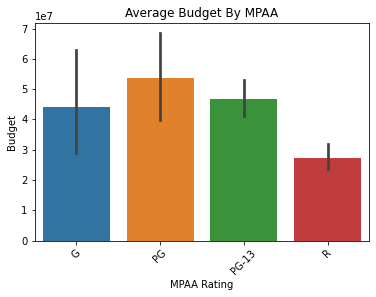

In [84]:
sns.barplot(data=df1, x='certification', y= 'budget')
plt.xticks(rotation = 45)
plt.title('Average Budget By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Budget');

This bar plot shows us what I had surmised but now supported that different MPAA Ratings get different budgets.